## Este algoritmo entrena un modelo con Epitopes de Influenza (tomando como dataset positivo Epitopes desde https://www.iedb.org/, y los epitopes negativos fueron generados mediante un script. 


      NumTiny  NumSmall  NumAliphatic  NumAromatic  NumNonPolar  NumPolar  \
0           2         4             2            3            6         2   
1           4         6             0            0            3         5   
2           3         4             2            1            4         4   
3           3         6             4            0            6         3   
4           3         4             4            2            8         1   
...       ...       ...           ...          ...          ...       ...   
4563        3         7             4            2            7         7   
4564        4         7             5            1           10         4   
4565        3        10             6            0            8         6   
4566        1         3             4            2            8         6   
4567        6        10             3            1            8         6   

      NumCharged  NumBasic  NumAcidic  PorcTiny  ...        z3        z4  \

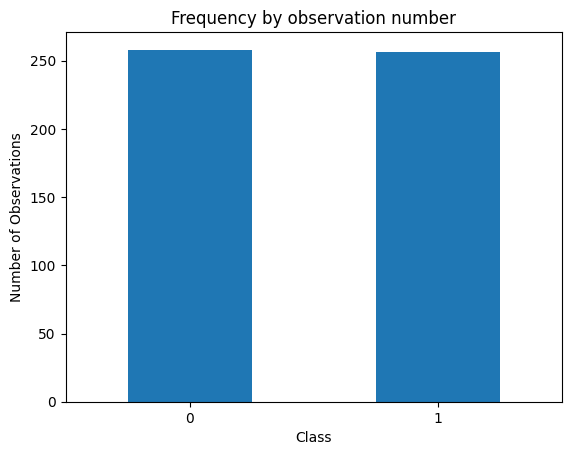

In [8]:
#MODULOS NECESARIOS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from joblib import dump, load
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

#ALGORITMO CLASIFICADOR
classifiers = [RandomForestClassifier(random_state=123),
               GaussianNB(var_smoothing=1e-9),
               DecisionTreeClassifier(random_state=123,min_samples_split=100),
               xgb.XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic'),
               SVC(random_state=123, probability=True)]  
result_table = pd.DataFrame(columns=['classifiers','fpr','tpr','auc'])

graph_acc=[]
Acc = [];Rec = [];Pre = [];acc = [];rec = [];pre = [];acc_std = [];rec_std = [];pre_std = [];F1 = [];Matt = [];f1 = []; matt=[];f1_std = []; matt_std = []
Std = [];Mean = [];Fpr = [];Tpr = [];Auc = [];Auc2 = [];Auc3 = []
mean_tpr=[]; W_range = range(0, 100)
#fc3=['at_hmoment_sheet', 'at_hmoment_alpha', 'st7', 'BulkyProperties', 'SideChainSize', 
#     'ExtendedStructurePreference', 'ElectronicProperties', 'st2', 'PorcAromatic', 'at_pi',
#     'PorcPolar', 'z2', 'Blosum8', 'at_index', 'z3', 'LocalFlexibility', 'Blosum3', 't1', 'Blosum2',
#     't2', 'at_charge', 'PorcAromatic', 'PorcBasic', 'PorcSmall','z5', 'pKC',
#     'AlphaAndTurnPropensities', 'HelixBendPreference', 'st3', 'PorcTiny', 'PorcCharged']
feature_cols =['PorcTiny','PorcSmall','PorcAliphatic','PorcAromatic','PorcNonPolar','PorcPolar','PorcCharged','PorcBasic','PorcAcidic','at_index','at_boman','at_charge','at_pi','at_hmoment_alpha','at_hmoment_sheet','HelixBendPreference','SideChainSize','ExtendedStructurePreference','Hidrophobicity','DoubleBendPreference','PartialSpecificVolume','FlatExtendedPreference','OccurrenceInAlphaRegion','pKC','SurroundingHidrophobicity','Blosum1','Blosum2','Blosum3','Blosum4','Blosum5','Blosum6','Blosum7','Blosum8','Blosum9','Blosum10','MsWhim1','MsWhim2','MsWhim3','st1','st2','st3','st4','st5','st6','st7','st8','t1','t2','t3','t4','t5','z1','z2','z3','z4','z5','HydrophobicityIndex','AlphaAndTurnPropensities','BulkyProperties','CompositionalCharacteristicIndex','LocalFlexibility','ElectronicProperties']
#feature_coll =['PorcTiny','PorcSmall','PorcAliphatic','PorcAromatic','PorcNonPolar','PorcPolar','PorcCharged','PorcBasic','PorcAcidic','at_index','at_boman','at_charge','at_pi','at_hmoment_alpha','at_hmoment_sheet','HelixBendPreference','SideChainSize','ExtendedStructurePreference','Hidrophobicity','DoubleBendPreference','PartialSpecificVolume','FlatExtendedPreference','OccurrenceInAlphaRegion','pKC','SurroundingHidrophobicity','Blosum1','Blosum2','Blosum3','Blosum4','Blosum5','Blosum6','Blosum7','Blosum8','Blosum9','Blosum10','MsWhim1','MsWhim2','MsWhim3','st1','st2','st3','st4','st5','st6','st7','st8','t1','t2','t3','t4','t5','z1','z2','z3','z4','z5','HydrophobicityIndex','AlphaAndTurnPropensities','BulkyProperties','CompositionalCharacteristicIndex','LocalFlexibility','ElectronicProperties']

cols=[*range(1, 75, 1)]
df_ref = pd.read_csv('descriptors_class_influenza_nonEpiAlgorithm.csv', sep=',',usecols=cols)
print(df_ref)
X=df_ref[feature_cols]
Y=df_ref.Class
X_p=preprocessing.normalize(X)

df2=df_ref.iloc[np.random.random_integers(256,4568,257),0:74]
#size for positive and negative samples is 257
df2.to_csv('source_nonEpiAlgorithm.csv', index=True)
df3=df_ref.iloc[0:257,0:74]
frames = [df3, df2]
print(len(df3),len(df2))
df4=pd.concat(frames)
Xrandom=df4[feature_cols]
print(Xrandom)
Yrandom=df4.Class
print(Yrandom)
X_prandom=preprocessing.normalize(Xrandom)
count_classes = Yrandom.value_counts()
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2))
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

RF,GaussianNB,DT,XG,SVM
acc
[0.7555339805825243, 0.6434951456310679, 0.5982524271844661, 0.6051456310679612, 0.5490291262135922] [0.04087782190719013, 0.04254333039246307, 0.048519994216983386, 0.04098548030249684, 0.06572428320326296]
rec
[0.7586538461538461, 0.7326923076923076, 0.5167307692307692, 0.6090384615384615, 0.4461538461538461] [0.04618388445585703, 0.044480898100847606, 0.12327673084107926, 0.1044871598238144, 0.21731620133102533]
pre
[0.7611037004547996, 0.628317946548309, 0.6314958433003035, 0.6135366991759114, 0.5015642019645074] [0.0557942563669008, 0.04447046290400344, 0.06950588302181473, 0.049179787961754075, 0.18928411765155068]
f1
[0.7583350958139375, 0.6751125858773714, 0.5581981108971396, 0.6053330916308858, 0.4622588745985922] [0.03780036620482652, 0.032675381144817085, 0.07711688067517722, 0.05591332136154504, 0.20375924051878092]
matt
[0.5130849777311234, 0.29097649363517497, 0.20661339970720616, 0.21451380927858718, 0.09739055220616841] [0.08231066917063483, 

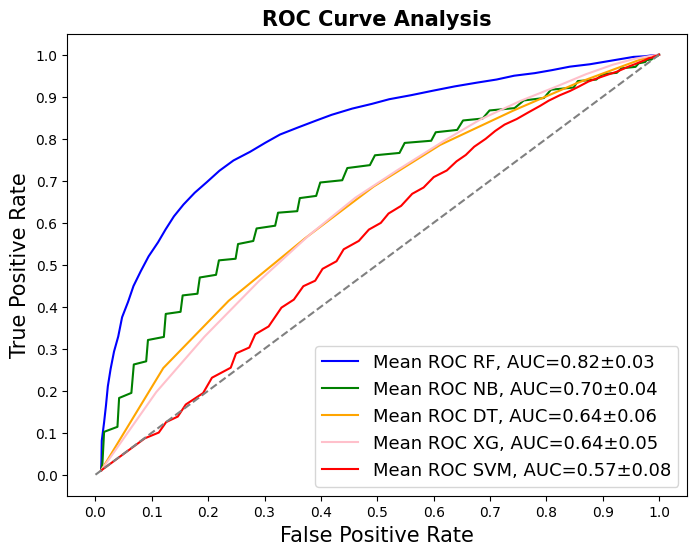

In [9]:
count = 0
for cls in classifiers: #BUCLE PARA CADA ALGORITMO CLASIFICADOR, RANDOM FOREST
    count=count+1
    if count == 1:
        name = "RF"
    if count == 2:
        name = "NB"
    if count == 3:
        name = "DT"
    if count == 4:
        name = "SVM"
    if count ==5:
        name = "XG"
    for i in W_range:   #BUCLE DE 100 REPETICIONES
        fpr_all=[]      #SETEAR VARIABLES, LISTAS VACÍAS PARA MATRIZ DE COSTO
        tpr_all=[]
        df2=df_ref.iloc[np.random.random_integers(256,4567,257),0:74]  #SELECCION DE EJEMPLOS NEGATIVOS
        df2.to_csv('source_nonEpiRef_'+str(name)+'_'+str(i)+'_Algorithm.csv', index=True)
        df3=df_ref.iloc[0:257,0:74] #EJEMPLOS POSITIVOS
        frames = [df3, df2]
        df4=pd.concat(frames)
        X_r=df4[feature_cols]    #SELECCION DE LOS DESCRIPTORES ELEGIDOS
        Y_r=df4.Class
        Y_r.value_counts()
        X_rn=preprocessing.normalize(X_r)          #ESCALAR VALORES DE DESCRIPTORS
        X_train, X_test, y_train, y_test = train_test_split(X_rn,Y_r, test_size=0.20,random_state=123) #DIVIDIR SET DE DATOS EN ENTRENAMIENTO Y PRUEBA
        model = cls.fit(X_train, y_train)          #CONSTRUIR MODELO
        y_pred = model.predict_proba(X_test)[::,1] #PREDECIR VALORES PARA EL TEST
        fpr, tpr, _ = roc_curve(y_test,y_pred)     #IDENTIFICAR FALSOS Y VERDADEROS POSITIVOS PARA CONTRUIR CURVA ROC
        fpr_all.append(fpr)
        tpr_all.append(tpr)
        auc = roc_auc_score(y_test, y_pred)        #CALCULAR VALORES PARA CURVA ROC
        Auc.append(auc)
        Acc.append(metrics.accuracy_score(y_test, y_pred.round())) #CALCULAR ESTADICTICAS ACCURACY, RECALL Y PRECISION
        Rec.append(metrics.recall_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        F1.append(metrics.f1_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Matt.append(metrics.matthews_corrcoef(y_test,y_pred.round()))
        result_table = result_table._append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

    Auc2.append(np.mean(Auc))
    Auc3.append(np.std(Auc))
    acc.append(np.mean(Acc)) #RESCATAR VALORES PARA CADA CLASIFICADOR
    rec.append(np.mean(Rec))
    pre.append(np.mean(Pre))
    f1.append(np.mean(F1))
    matt.append(np.mean(Matt))
    acc_std.append(np.std(Acc))
    rec_std.append(np.std(Rec))
    pre_std.append(np.std(Pre))
    f1_std.append(np.std(F1))
    matt_std.append(np.std(Matt))
    Auc=[] #VACIAR LISTAS
    Acc=[]
    Rec=[]
    Pre=[]
    F1=[]
    Matt=[]

##IMPRESION DE ESTADISTICAS ACCURACY, RECALL Y PRECISION JUNTO A SUS DESVIACIONES
##RF,GaussianNB,DT,XGB,SVC
print("RF,GaussianNB,DT,XG,SVM")
print("acc")
print(acc,acc_std)
print("rec")
print(rec,rec_std)
print("pre")
print(pre,pre_std)
print("f1")
print(f1,f1_std)
print("matt")
print(matt,matt_std)

fpr_rf=result_table['fpr'][0:99]
fpr_nb=result_table['fpr'][100:199]
fpr_dt=result_table['fpr'][200:299]
fpr_xg=result_table['fpr'][300:399]
fpr_svm=result_table['fpr'][400:499]

tpr_rf=result_table['tpr'][0:99]
tpr_nb=result_table['tpr'][100:199]
tpr_dt=result_table['tpr'][200:299]
tpr_xg=result_table['tpr'][300:399]
tpr_svm=result_table['tpr'][400:499]

fpr_rf =fpr_rf.to_list()
fpr_nb =fpr_nb.to_list()
fpr_dt =fpr_dt.to_list()
fpr_xg =fpr_xg.to_list()
fpr_svm =fpr_svm.to_list()

tpr_rf =tpr_rf.to_list()
tpr_nb =tpr_nb.to_list()
tpr_dt =tpr_dt.to_list()
tpr_xg =tpr_xg.to_list()
tpr_svm=tpr_svm.to_list()

matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_rf = np.mean(matrix,axis=1)
std_fpr_rf = np.std(matrix,axis=1)
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_rf = np.mean(matrix,axis=1)
std_tpr_rf = np.std(matrix,axis=1)


for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_dt = np.mean(matrix,axis=1)
std_fpr_dt = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_dt = np.mean(matrix,axis=1)
std_tpr_dt = np.std(matrix,axis=1)

matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_svm = np.mean(matrix,axis=1)
std_fpr_svm = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_svm = np.mean(matrix,axis=1)
std_tpr_svm = np.std(matrix,axis=1)


for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_nb:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_nb = np.mean(matrix,axis=1)
std_fpr_nb = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_nb:            
    col=0
    for elemento2 in elemento:    
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1    
    fila=fila+1 
mean_tpr_nb = np.mean(matrix,axis=1)
std_tpr_nb = np.std(matrix,axis=1)
##xg
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_xg:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_xg = np.mean(matrix,axis=1)
std_fpr_xg = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_xg:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1
mean_tpr_xg = np.mean(matrix,axis=1)
std_tpr_xg = np.std(matrix,axis=1)


plt.figure(figsize=(8,6))
clasif = ["RF","NB","DT","XG","SVM"]
plt.plot(mean_fpr_rf, mean_tpr_rf, color='blue', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[0], Auc2[0],Auc3[0]))
plt.plot(mean_fpr_nb, mean_tpr_nb, color='green', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[1], Auc2[1],Auc3[1]))
plt.plot(mean_fpr_dt, mean_tpr_dt, color='orange',label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[2], Auc2[2],Auc3[2]))
plt.plot(mean_fpr_xg,mean_tpr_xg,color='pink',  label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[3], Auc2[3],Auc3[3]))
plt.plot(mean_fpr_svm, mean_tpr_svm, color='red',   label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[4], Auc2[4],Auc3[4]))
plt.plot([0,1], [0,1], color='grey', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
result_table.set_index('classifiers', inplace=True)
plt.savefig('ROCcurve_0_Algorithm.png')
plt.show()


#dump(cls, 'model.joblib') 

257 257


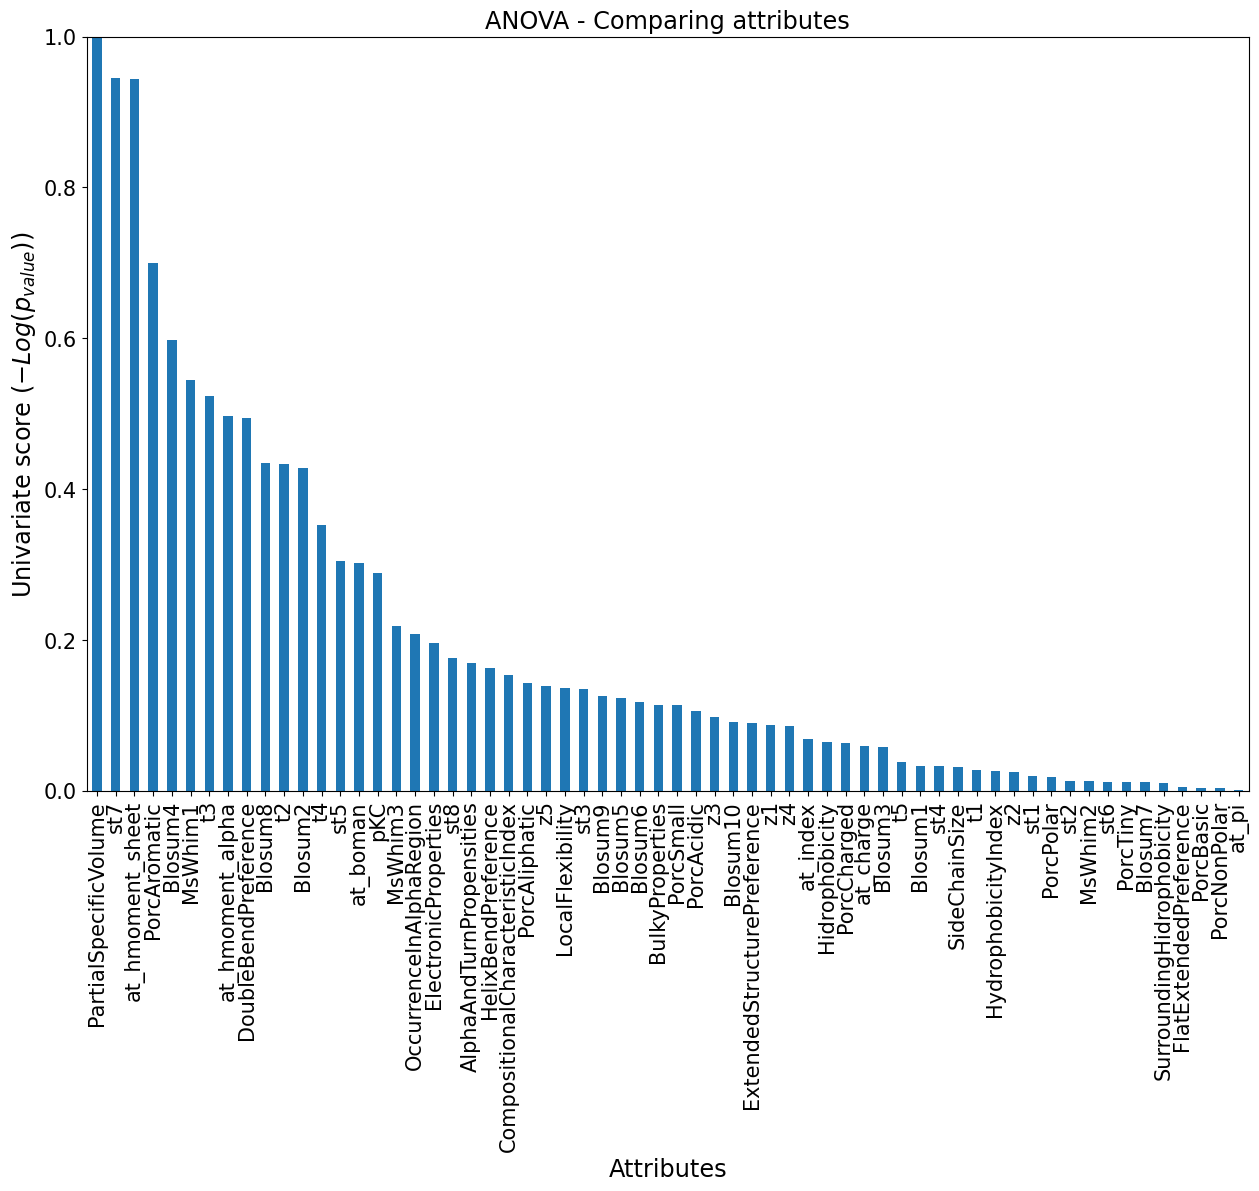

In [24]:
from sklearn.feature_selection import f_classif, chi2, f_regression

#select ANOVA
feature_cols =['PorcTiny','PorcSmall','PorcAliphatic','PorcAromatic','PorcNonPolar','PorcPolar','PorcCharged','PorcBasic','PorcAcidic','at_index','at_boman','at_charge','at_pi','at_hmoment_alpha','at_hmoment_sheet','HelixBendPreference','SideChainSize','ExtendedStructurePreference','Hidrophobicity','DoubleBendPreference','PartialSpecificVolume','FlatExtendedPreference','OccurrenceInAlphaRegion','pKC','SurroundingHidrophobicity','Blosum1','Blosum2','Blosum3','Blosum4','Blosum5','Blosum6','Blosum7','Blosum8','Blosum9','Blosum10','MsWhim1','MsWhim2','MsWhim3','st1','st2','st3','st4','st5','st6','st7','st8','t1','t2','t3','t4','t5','z1','z2','z3','z4','z5','HydrophobicityIndex','AlphaAndTurnPropensities','BulkyProperties','CompositionalCharacteristicIndex','LocalFlexibility','ElectronicProperties']
X=df_ref[feature_cols]
Y=df_ref.Class
df2=df_ref.iloc[np.random.random_integers(256,4567,257),0:74]
df3=df_ref.iloc[0:257,0:74]
print(len(df2),len(df3))
frames = [df3, df2]
df4=pd.concat(frames)
Xrandom=df4[feature_cols]
Y=df4.Class
X_p=preprocessing.normalize(Xrandom)
df2.to_csv('source_nonEpiAlgorithm_ANOVA.csv', index=True)
V_range = range(0, 62)
asel = SelectKBest(f_classif, k='all')
#asel.fit(X_prandom,Yrandom) #desde valores originales no balanced
asel.fit(X_p,Y)
scores = asel.scores_[asel.get_support()]
total_f_reg=-np.log10(asel.pvalues_)
total_f_reg /= total_f_reg.max()
names_scores = zip(feature_cols, total_f_reg)
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_reg_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_reg_Scores', 'Feat_names'], ascending = [False, True])
X_indices = np.arange(X.shape[-1])
plt.figure(figsize=(15, 13))

plt.xticks(X_indices,ns_df_sorted['Feat_names'],rotation=90,fontsize='15')
plt.yticks(fontsize='15')
plt.bar(X_indices, ns_df_sorted['F_reg_Scores'], label="Regression($-Log(p_{value})$)",width=0.5)
plt.title("ANOVA - Comparing attributes",fontsize='xx-large')
plt.xlabel("Attributes",fontsize='xx-large')
plt.ylabel("Univariate score ($-Log(p_{value})$)",fontsize='xx-large')

plt.subplots_adjust(bottom=0.3)
plt.margins(0.005)
plt.ylim(0, 1)
plt.savefig('ANOVA_NegEpi_RefAlgorithm.png')
plt.show()

In [25]:
print(list(ns_df_sorted['Feat_names']))
print(*ns_df_sorted['Feat_names'][0:20])
print(list(ns_df_sorted['F_reg_Scores']))

['PartialSpecificVolume', 'st7', 'at_hmoment_sheet', 'PorcAromatic', 'Blosum4', 'MsWhim1', 't3', 'at_hmoment_alpha', 'DoubleBendPreference', 'Blosum8', 't2', 'Blosum2', 't4', 'st5', 'at_boman', 'pKC', 'MsWhim3', 'OccurrenceInAlphaRegion', 'ElectronicProperties', 'st8', 'AlphaAndTurnPropensities', 'HelixBendPreference', 'CompositionalCharacteristicIndex', 'PorcAliphatic', 'z5', 'LocalFlexibility', 'st3', 'Blosum9', 'Blosum5', 'Blosum6', 'BulkyProperties', 'PorcSmall', 'PorcAcidic', 'z3', 'Blosum10', 'ExtendedStructurePreference', 'z1', 'z4', 'at_index', 'Hidrophobicity', 'PorcCharged', 'at_charge', 'Blosum3', 't5', 'Blosum1', 'st4', 'SideChainSize', 't1', 'HydrophobicityIndex', 'z2', 'st1', 'PorcPolar', 'st2', 'MsWhim2', 'st6', 'PorcTiny', 'Blosum7', 'SurroundingHidrophobicity', 'FlatExtendedPreference', 'PorcBasic', 'PorcNonPolar', 'at_pi']
PartialSpecificVolume st7 at_hmoment_sheet PorcAromatic Blosum4 MsWhim1 t3 at_hmoment_alpha DoubleBendPreference Blosum8 t2 Blosum2 t4 st5 at_boman

In [26]:
feature_coll = list(ns_df_sorted['Feat_names'])
print(feature_coll[0])
graph_acc=[]
V_range = range(0, 62) #
print(V_range)
Acc = []
Rec = []
Pre = []
Std = []
Mean = []
fc = []
W_range = range(0, 100)
for k in V_range: #atributos
    fc.append(feature_coll[k])
    print(fc)
    for l in W_range: #100 veces
        df2=df_ref.iloc[np.random.random_integers(256,4567,257),0:74]
        df3=df_ref.iloc[0:257,0:74] 
        frames = [df3, df2]
        df4=pd.concat(frames)
        X_r=df4[fc]
        Y_r=df4.Class
        X_rn=preprocessing.normalize(X_r)
        X_train, X_test, y_train, y_test = train_test_split(X_rn,Y_r, test_size=0.2,random_state=123)
        RF = RandomForestClassifier(random_state=123)
        RF.fit(X_train, y_train)
        y_pred = RF.predict(X_test)
        Acc.append(metrics.accuracy_score(y_test, y_pred))
        Rec.append(metrics.recall_score(y_test,y_pred,average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred,average='binary',pos_label = 1))
    Mean.append(np.mean(Acc))
    Std.append(np.std(Acc))


PartialSpecificVolume
range(0, 62)
['PartialSpecificVolume']
['PartialSpecificVolume', 'st7']
['PartialSpecificVolume', 'st7', 'at_hmoment_sheet']
['PartialSpecificVolume', 'st7', 'at_hmoment_sheet', 'PorcAromatic']
['PartialSpecificVolume', 'st7', 'at_hmoment_sheet', 'PorcAromatic', 'Blosum4']
['PartialSpecificVolume', 'st7', 'at_hmoment_sheet', 'PorcAromatic', 'Blosum4', 'MsWhim1']
['PartialSpecificVolume', 'st7', 'at_hmoment_sheet', 'PorcAromatic', 'Blosum4', 'MsWhim1', 't3']
['PartialSpecificVolume', 'st7', 'at_hmoment_sheet', 'PorcAromatic', 'Blosum4', 'MsWhim1', 't3', 'at_hmoment_alpha']
['PartialSpecificVolume', 'st7', 'at_hmoment_sheet', 'PorcAromatic', 'Blosum4', 'MsWhim1', 't3', 'at_hmoment_alpha', 'DoubleBendPreference']
['PartialSpecificVolume', 'st7', 'at_hmoment_sheet', 'PorcAromatic', 'Blosum4', 'MsWhim1', 't3', 'at_hmoment_alpha', 'DoubleBendPreference', 'Blosum8']
['PartialSpecificVolume', 'st7', 'at_hmoment_sheet', 'PorcAromatic', 'Blosum4', 'MsWhim1', 't3', 'at_hmome

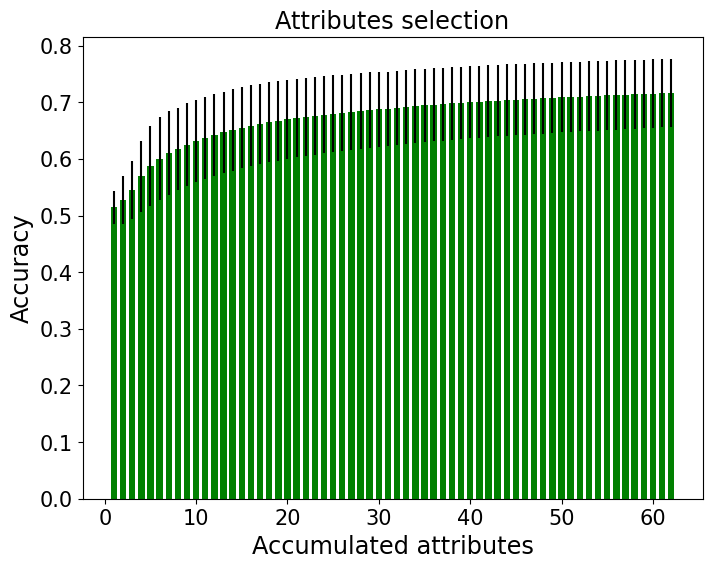

In [27]:
rango=[]
for i in V_range:
    rango.append(i+1)
import matplotlib.pyplot as plot
plt.figure(figsize=(8,6))
plt.bar(rango,Mean,yerr=Std,color="green",width=0.7)
plt.ylabel('Accuracy',fontsize='xx-large')
plt.xlabel('Accumulated attributes', fontsize='xx-large')
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.title('Attributes selection',fontsize='xx-large')
plt.savefig('AccurracyANOVA_NegEpiAlgorithm.png')
plt.show()

RF,GaussianNB,DT,XGB,SVC
acc
[0.7184466019417474, 0.5778640776699029, 0.6166990291262134, 0.6033009708737864, 0.6114563106796116] [0.03696977235856265, 0.03305194328401366, 0.04769115457716856, 0.04480811299632315, 0.035031730900082346]
rec
[0.7271153846153845, 0.8978846153846155, 0.5648076923076922, 0.6328846153846155, 0.8809615384615384] [0.043317921322384656, 0.0123721270049745, 0.10958687213520923, 0.12003743868639706, 0.03843220034903856]
pre
[0.7207105681108114, 0.5510710646293606, 0.6414140546406858, 0.6045783439433201, 0.5770999048159527] [0.044395741330101386, 0.02205376765336714, 0.0622463089350511, 0.04357285734936109, 0.028827661632846897]
f1
[0.7228513470386158, 0.6826904366951021, 0.593252810108271, 0.6118965788103478, 0.6963227662877663] [0.0345122134826021, 0.017434300203455672, 0.0702592980768594, 0.0667730702217176, 0.019207781699247636]
matt
[0.43803716841496765, 0.19206095236391202, 0.24006544003560787, 0.21102630938478062, 0.25937528606943744] [0.0739065253222144, 

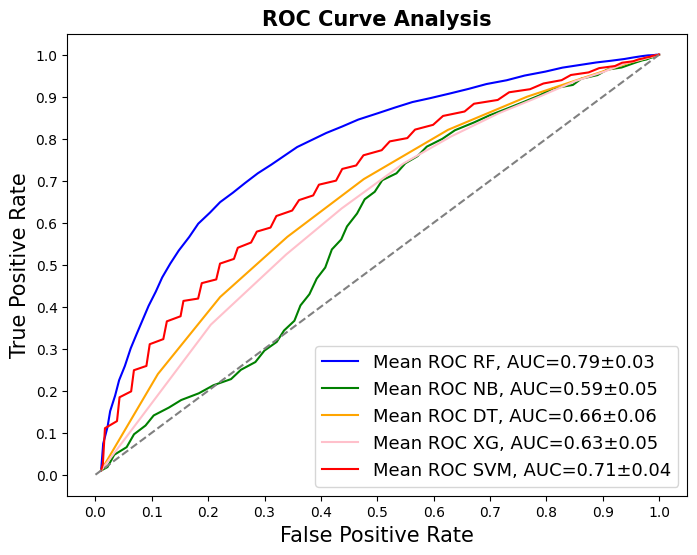

In [28]:
classifiers = [RandomForestClassifier(random_state=123),
               GaussianNB(var_smoothing=1e-9),
               DecisionTreeClassifier(random_state=123,min_samples_split=100),
               xgb.XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic'),
               SVC(random_state=123, probability=True)]  
##RF,GaussianNB,DT,XGB,SVC         

#TABLA RESULTADOS SOBRE MATRIZ DE CONFUSION Y CURVA ROC
result_table = pd.DataFrame(columns=['classifiers','fpr','tpr','auc'])

graph_acc=[]
Acc = [];Rec = [];Pre = [];acc = [];rec = [];pre = [];acc_std = [];rec_std = [];pre_std = [];F1 = [];Matt = [];f1 = []; matt=[];f1_std = []; matt_std = []
Std = [];Mean = [];Fpr = [];Tpr = [];Auc = [];Auc2 = [];Auc3 = []
mean_tpr=[]; W_range = range(0, 100)

#ANOVA selection of best 20
fc1=['PartialSpecificVolume', 'st7', 'at_hmoment_sheet', 'PorcAromatic', 'Blosum4', 'MsWhim1', 't3', 'at_hmoment_alpha', 'DoubleBendPreference', 'Blosum8', 't2', 'Blosum2', 't4', 'st5', 'at_boman', 'pKC', 'MsWhim3', 'OccurrenceInAlphaRegion', 'ElectronicProperties', 'st8']


count = 0
for cls in classifiers: #BUCLE PARA CADA ALGORITMO CLASIFICADOR, RANDOM FOREST
    count=count+1
    if count == 1:
        name = "RF"
    if count == 2:
        name = "NB"
    if count == 3:
        name = "DT"
    if count == 4:
        name = "SVM"
    if count ==5:
        name = "XG"
#print(cls)
    for i in W_range:   #BUCLE DE 100 REPETICIONES
        fpr_all=[]      #SETEAR VARIABLES, LISTAS VACÍAS PARA MATRIZ DE COSTO
        tpr_all=[]
        df2=df_ref.iloc[np.random.random_integers(256,2050,257),0:74]  #SELECCION DE EJEMPLOS NEGATIVOS
        df2.to_csv('source_nonEpiRef_'+str(name)+'_'+str(i)+'_ANOVA_Algorithm.csv', index=True)
        df3=df_ref.iloc[0:257,0:74] #EJEMPLOS POSITIVOS
        frames = [df3, df2]
        df4=pd.concat(frames)
        X_r=df4[fc1]    #SELECCION DE LOS DESCRIPTORES ELEGIDOS
        Y_r=df4.Class
        Y_r.value_counts()
        X_rn=preprocessing.normalize(X_r)          #ESCALAR VALORES DE DESCRIPTORS
        X_train, X_test, y_train, y_test = train_test_split(X_rn,Y_r, test_size=0.20,random_state=123) #DIVIDIR SET DE DATOS EN ENTRENAMIENTO Y PRUEBA
        model = cls.fit(X_train, y_train)          #CONSTRUIR MODELO
        y_pred = model.predict_proba(X_test)[::,1] #PREDECIR VALORES PARA EL TEST
        fpr, tpr, _ = roc_curve(y_test,y_pred)     #IDENTIFICAR FALSOS Y VERDADEROS POSITIVOS PARA CONTRUIR CURVA ROC
        fpr_all.append(fpr)
        tpr_all.append(tpr)
        auc = roc_auc_score(y_test, y_pred)        #CALCULAR VALORES PARA CURVA ROC
        Auc.append(auc)
        Acc.append(metrics.accuracy_score(y_test, y_pred.round())) #CALCULAR ESTADICTICAS ACCURACY, RECALL Y PRECISION
        Rec.append(metrics.recall_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        F1.append(metrics.f1_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Matt.append(metrics.matthews_corrcoef(y_test,y_pred.round()))
        result_table = result_table._append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

    Auc2.append(np.mean(Auc))
    Auc3.append(np.std(Auc))
    acc.append(np.mean(Acc)) #RESCATAR VALORES PARA CADA CLASIFICADOR
    rec.append(np.mean(Rec))
    pre.append(np.mean(Pre))
    f1.append(np.mean(F1))
    matt.append(np.mean(Matt))
    acc_std.append(np.std(Acc))
    rec_std.append(np.std(Rec))
    pre_std.append(np.std(Pre))
    f1_std.append(np.std(F1))
    matt_std.append(np.std(Matt))
    Auc=[] #VACIAR LISTAS
    Acc=[]
    Rec=[]
    Pre=[]
    F1=[]
    Matt=[]

##IMPRESION DE ESTADISTICAS ACCURACY, RECALL Y PRECISION JUNTO A SUS DESVIACIONES
print("RF,GaussianNB,DT,XGB,SVC")
#RF,GaussianNB,DT,XGB,SVC 
print("acc")
print(acc,acc_std)
print("rec")
print(rec,rec_std)
print("pre")
print(pre,pre_std)
print("f1")
print(f1,f1_std)
print("matt")
print(matt,matt_std)

fpr_rf=result_table['fpr'][0:99]
fpr_nb=result_table['fpr'][100:199]
fpr_dt=result_table['fpr'][200:299]
fpr_xg=result_table['fpr'][300:399]
fpr_svm=result_table['fpr'][400:499]

tpr_rf=result_table['tpr'][0:99]
tpr_nb=result_table['tpr'][100:199]
tpr_dt=result_table['tpr'][200:299]
tpr_xg=result_table['tpr'][300:399]
tpr_svm=result_table['tpr'][400:499]

fpr_rf =fpr_rf.to_list()
fpr_nb =fpr_nb.to_list()
fpr_dt =fpr_dt.to_list()
fpr_xg =fpr_xg.to_list()
fpr_svm =fpr_svm.to_list()

tpr_rf =tpr_rf.to_list()
tpr_nb=tpr_nb.to_list()
tpr_dt =tpr_dt.to_list()
tpr_xg =tpr_xg.to_list()
tpr_svm =tpr_svm.to_list()

matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_rf = np.mean(matrix,axis=1)
std_fpr_rf = np.std(matrix,axis=1)
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_rf = np.mean(matrix,axis=1)
std_tpr_rf = np.std(matrix,axis=1)


for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_dt = np.mean(matrix,axis=1)
std_fpr_dt = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_dt = np.mean(matrix,axis=1)
std_tpr_dt = np.std(matrix,axis=1)

matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_svm = np.mean(matrix,axis=1)
std_fpr_svm = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_svm = np.mean(matrix,axis=1)
std_tpr_svm = np.std(matrix,axis=1)


for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_nb:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_nb = np.mean(matrix,axis=1)
std_fpr_nb = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_nb:            
    col=0
    for elemento2 in elemento:    
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1    
    fila=fila+1 
mean_tpr_nb = np.mean(matrix,axis=1)
std_tpr_nb = np.std(matrix,axis=1)
##xg
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_xg:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_xg = np.mean(matrix,axis=1)
std_fpr_xg = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_xg:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1
mean_tpr_xg = np.mean(matrix,axis=1)
std_tpr_xg = np.std(matrix,axis=1)


plt.figure(figsize=(8,6))
clasif = ["RF","NB","DT","XG","SVM"]
#RF,GaussianNB,DT,XGB,SVC 
plt.plot(mean_fpr_rf, mean_tpr_rf, color='blue', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[0], Auc2[0],Auc3[0]))
plt.plot(mean_fpr_nb, mean_tpr_nb, color='green', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[1], Auc2[1],Auc3[1])) 
plt.plot(mean_fpr_dt, mean_tpr_dt, color='orange',label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[2], Auc2[2],Auc3[2]))
plt.plot(mean_fpr_xg,mean_tpr_xg,color='pink',  label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[3], Auc2[3],Auc3[3]))
plt.plot(mean_fpr_svm, mean_tpr_svm, color='red',   label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[4], Auc2[4],Auc3[4]))
plt.plot([0,1], [0,1], color='grey', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
result_table.set_index('classifiers', inplace=True)
plt.savefig('ROCcurve_1_anova_Algorithm.png')
plt.show()


#dump(cls, 'model.joblib') 

[0.01992446 0.         0.03256786 0.12415378 0.03217107 0.03262065
 0.0177438  0.11463914 0.04886232 0.01288635 0.05010229 0.02003586
 0.02118072 0.         0.01158096 0.         0.         0.04512613
 0.         0.0025991  0.05524545 0.02657263 0.02007192 0.04031542
 0.00676947 0.01419108 0.         0.028298   0.0209922  0.00296463
 0.03200187 0.         0.01569707 0.04341302 0.02595996 0.
 0.         0.00393854 0.00432711 0.         0.02524357 0.03901986
 0.04761692 0.01604679 0.02093643 0.00285009 0.0083283  0.06580766
 0.02050819 0.         0.         0.         0.03512976 0.
 0.         0.01933719 0.02191204 0.         0.         0.00192506
 0.02226205 0.01555822]


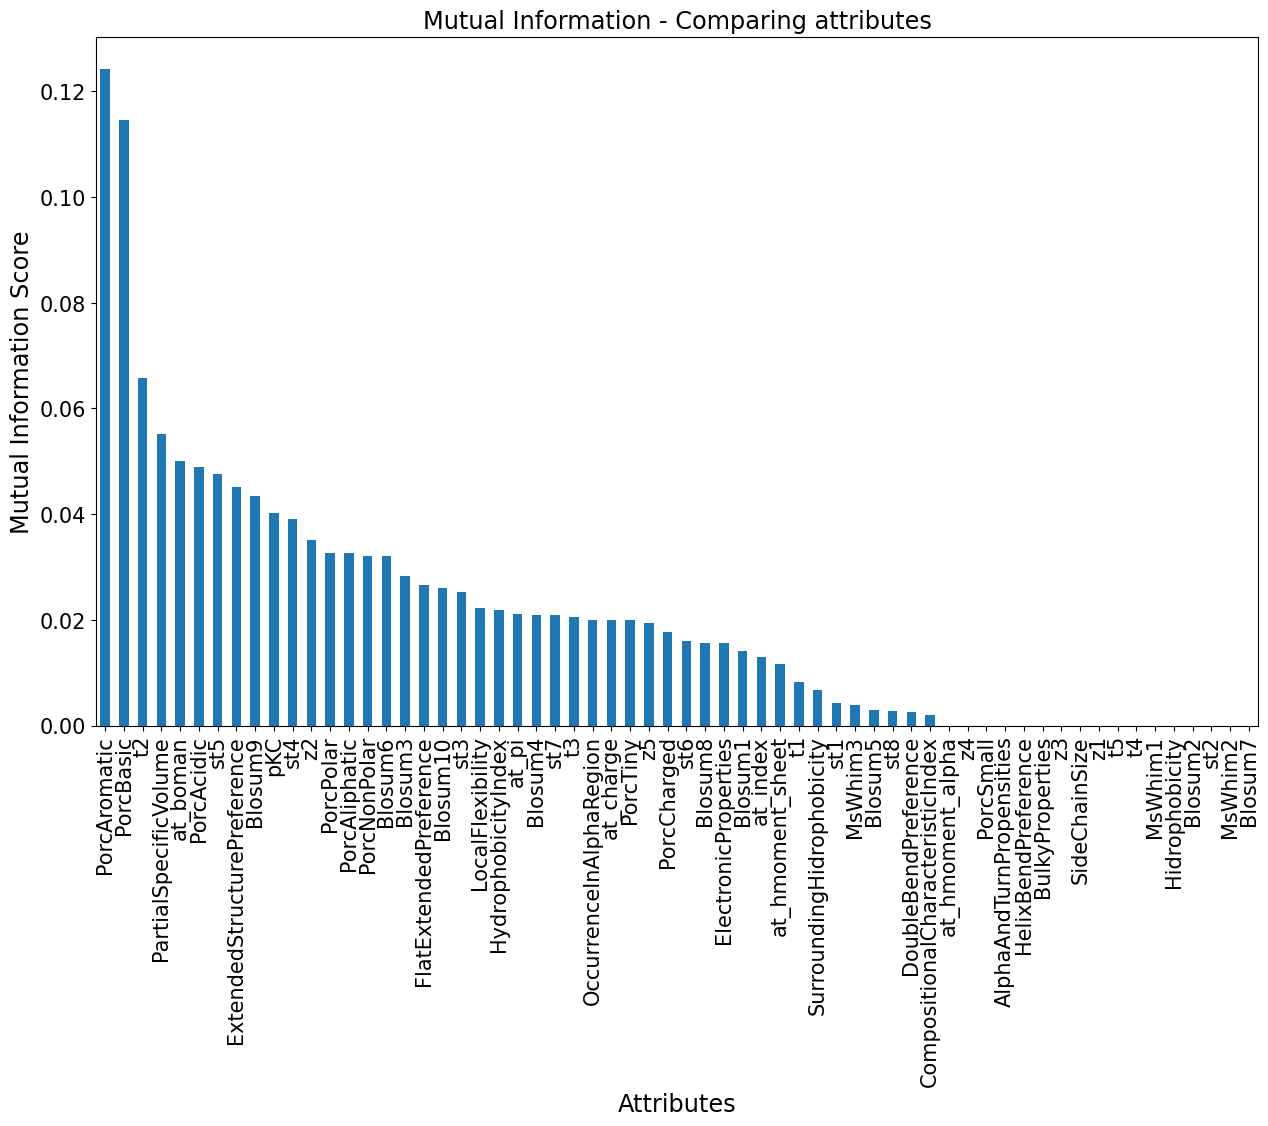

In [15]:
df2=df_ref.iloc[np.random.random_integers(256,4567,257),0:74]  #SELECCION DE EJEMPLOS NEGATIVOS
df2.to_csv('source_nonEpiAlgorithm_'+str(name)+'_MI_0.csv', index=True)
df3=df_ref.iloc[0:257,0:74] #EJEMPLOS POSITIVOS
frames = [df3, df2]
df4=pd.concat(frames)
X_r=df4[feature_cols]    #SELECCION DE LOS DESCRIPTORES ELEGIDOS
Y_r=df4.Class
Y_r.value_counts()
X_rn=preprocessing.normalize(X_r)          #ESCALAR VALORES DE DESCRIPTORS
X_train,X_test,y_train,y_test=train_test_split(X_rn,Y_r,test_size=0.2,random_state=123)

mutual_info = mutual_info_classif(X_train, y_train,random_state=123)
print(mutual_info)
mutual_info = pd.Series(mutual_info)
mutual_info.index = feature_cols
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,13))

sel = SelectKBest(mutual_info_classif, k='all')
mi=sel.fit(X_train, y_train)
mutual_info.index[sel.get_support()]
plt.subplots_adjust(bottom=0.35)
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')

plt.title("Mutual Information - Comparing attributes",fontsize='xx-large')
plt.xlabel("Attributes",fontsize='xx-large')
plt.ylabel("Mutual Information Score",fontsize='xx-large')
plt.savefig('MutualInfo_NegEpiAlgorithm.png',pad_inches=1.5)

In [16]:
print(*mutual_info.sort_values(ascending=False).index[sel.get_support()][0:20],sep = "', '")
print(*mutual_info.sort_values(ascending=False))
print(*mutual_info.sort_values(ascending=False).index[sel.get_support()],sep = "', '")



PorcAromatic', 'PorcBasic', 't2', 'PartialSpecificVolume', 'at_boman', 'PorcAcidic', 'st5', 'ExtendedStructurePreference', 'Blosum9', 'pKC', 'st4', 'z2', 'PorcPolar', 'PorcAliphatic', 'PorcNonPolar', 'Blosum6', 'Blosum3', 'FlatExtendedPreference', 'Blosum10', 'st3
0.12415377883081513 0.11463913618356814 0.0658076616679284 0.05524545420791105 0.050102294525305346 0.04886231860223478 0.047616924316607134 0.04512613118884223 0.0434130246747515 0.04031541501853253 0.03901985769034333 0.03512975617250458 0.032620654028366 0.03256786378124943 0.03217106882674137 0.032001874679445264 0.02829799642103681 0.026572626629973506 0.025959961315380697 0.02524356810362005 0.022262047056405887 0.02191203672752473 0.021180715613331014 0.020992195341083875 0.020936430574069798 0.020508185529036327 0.020071922684014254 0.020035861151602274 0.019924462682539668 0.01933719413155277 0.017743800009176303 0.016046791286620232 0.015697073920338145 0.015558217884440229 0.014191077387110562 0.01288635449982456 0

In [17]:
graph_acc=[]

W_range = range(0, 100)
Acc = []
Rec = []
Pre = []
Std = []
Mean = []
fc = []
feature_col = mutual_info.sort_values(ascending=False).index[sel.get_support()]
print(feature_col)

for k in V_range: #veces de atributo
    fc.append(feature_col[k])
    print(df_ref[fc].head(0))
    for l in W_range:
        df2=df_ref.iloc[np.random.random_integers(256,4567,257),0:74] #0:62
        df3=df_ref.iloc[0:257,0:74] #0:62
        frames = [df3, df2]
        df4=pd.concat(frames)
        X_r=df4[fc]
        Y_r=df4.Class
        Y_r.value_counts()
        X_rn=preprocessing.normalize(X_r)
        X_train, X_test, y_train, y_test = train_test_split(X_rn,Y_r, test_size=0.20,random_state=123)
        RF=RandomForestClassifier(random_state=123)
        RF.fit(X_train,y_train)
        y_pred = RF.predict(X_test)
        Acc.append(metrics.accuracy_score(y_test, y_pred))
        Rec.append(metrics.recall_score(y_test,y_pred,average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred,average='binary',pos_label = 1))
    #print(np.mean(Acc))
    Mean.append(np.mean(Acc))
    Std.append(np.std(Acc))



Index(['PorcAromatic', 'PorcBasic', 't2', 'PartialSpecificVolume', 'at_boman',
       'PorcAcidic', 'st5', 'ExtendedStructurePreference', 'Blosum9', 'pKC',
       'st4', 'z2', 'PorcPolar', 'PorcAliphatic', 'PorcNonPolar', 'Blosum6',
       'Blosum3', 'FlatExtendedPreference', 'Blosum10', 'st3',
       'LocalFlexibility', 'HydrophobicityIndex', 'at_pi', 'Blosum4', 'st7',
       't3', 'OccurrenceInAlphaRegion', 'at_charge', 'PorcTiny', 'z5',
       'PorcCharged', 'st6', 'Blosum8', 'ElectronicProperties', 'Blosum1',
       'at_index', 'at_hmoment_sheet', 't1', 'SurroundingHidrophobicity',
       'st1', 'MsWhim3', 'Blosum5', 'st8', 'DoubleBendPreference',
       'CompositionalCharacteristicIndex', 'at_hmoment_alpha', 'z4',
       'PorcSmall', 'AlphaAndTurnPropensities', 'HelixBendPreference',
       'BulkyProperties', 'z3', 'SideChainSize', 'z1', 't5', 't4', 'MsWhim1',
       'Hidrophobicity', 'Blosum2', 'st2', 'MsWhim2', 'Blosum7'],
      dtype='object')
Empty DataFrame
Columns: [PorcArom

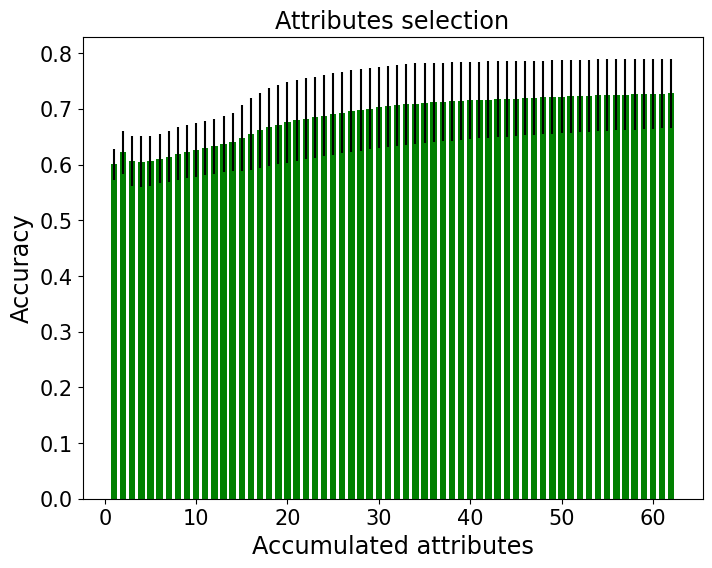

In [19]:
rango=[]
#print(graph_acc)
for i in V_range:
    rango.append(i+1)
    
import matplotlib.pyplot as plot
plt.figure(figsize=(8,6))
plt.bar(rango,Mean,yerr=Std,color="green",width=0.7)
plt.ylabel('Accuracy',fontsize='xx-large')
plt.xlabel('Accumulated attributes',fontsize='xx-large')
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.title('Attributes selection',fontsize='xx-large')
plt.savefig('AccuracyMutualInfo_NegEpiAlgorithm.png')
plt.show()

RF,GaussianNB,DT,XGB,SVC
acc
[0.7473786407766991, 0.6000970873786408, 0.6807766990291262, 0.6588349514563108, 0.5557281553398057] [0.03457128734868336, 0.03945368751313864, 0.04514886719792968, 0.03567270919298021, 0.045145526672809654]
rec
[0.6892307692307692, 0.6363461538461539, 0.590576923076923, 0.6411538461538462, 0.48807692307692313] [0.03594868137091668, 0.052602042280419176, 0.08996609321846805, 0.1027801410606626, 0.11212643434135641]
pre
[0.7871322144760525, 0.5991914531117629, 0.7333238881050914, 0.6882489523245813, 0.5554002784789769] [0.051511076627948994, 0.040703332610505905, 0.06625843964303221, 0.08972958294576464, 0.11128204390789664]
f1
[0.7339000485443299, 0.6160436322855504, 0.6485620464315993, 0.651808866810328, 0.516536838398276] [0.03330406126021686, 0.037637440401231466, 0.059430546005536135, 0.04164906548241677, 0.1071149330473394]
matt
[0.5004569828553671, 0.20078812017112768, 0.3739234607023681, 0.32886671925036304, 0.11359479116816308] [0.07146471467136473,

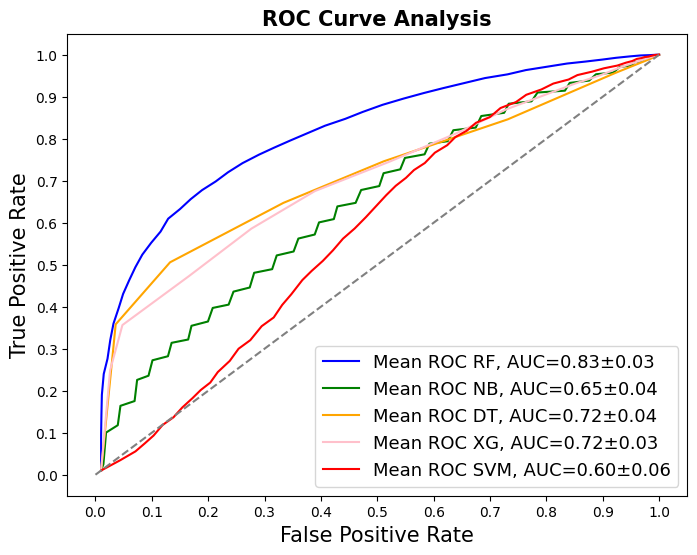

In [20]:
#mutualinfo
classifiers = [RandomForestClassifier(random_state=123),
               GaussianNB(var_smoothing=1e-9),
               DecisionTreeClassifier(random_state=123,min_samples_split=100),
               xgb.XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic'),
               SVC(random_state=123, probability=True)]  
#("RF,GaussianNB,DT,XGB,SVM")       

#TABLA RESULTADOS SOBRE MATRIZ DE CONFUSION Y CURVA ROC
result_table = pd.DataFrame(columns=['classifiers','fpr','tpr','auc'])

graph_acc=[]
Acc = [];Rec = [];Pre = [];acc = [];rec = [];pre = [];acc_std = [];rec_std = [];pre_std = [];F1 = [];Matt = [];f1 = []; matt=[];f1_std = []; matt_std = []
Std = [];Mean = [];Fpr = [];Tpr = [];Auc = [];Auc2 = [];Auc3 = []
mean_tpr=[]; W_range = range(0, 100)


fc2=['PorcAromatic', 'PorcBasic', 't2', 'PartialSpecificVolume', 'at_boman', 'PorcAcidic', 'st5', 'ExtendedStructurePreference', 'Blosum9', 'pKC', 'st4', 'z2', 'PorcPolar', 'PorcAliphatic', 'PorcNonPolar', 'Blosum6', 'Blosum3', 'FlatExtendedPreference', 'Blosum10', 'st3']

count = 0

for cls in classifiers: #BUCLE PARA CADA ALGORITMO CLASIFICADOR, RANDOM FOREST
    count=count+1
    if count == 1:
        name = "RF"
    if count == 2:
        name = "NB"
    if count == 3:
        name = "DT"
    if count == 4:
        name = "SVM"
    if count ==5:
        name = "XG"
    #print(cls)
    for i in W_range:   #BUCLE DE 100 REPETICIONES
        fpr_all=[]      #SETEAR VARIABLES, LISTAS VACÍAS PARA MATRIZ DE COSTO
        tpr_all=[]
        df2=df_ref.iloc[np.random.random_integers(256,4567,257),0:74]  #SELECCION DE EJEMPLOS NEGATIVOS
        df2.to_csv('source_nonEpiAlgorithm_'+str(name)+'_'+str(i)+'_MI_1.csv', index=True)
        df3=df_ref.iloc[0:257,0:74] #EJEMPLOS POSITIVOS
        frames = [df3, df2]
        df4=pd.concat(frames)
        X_r=df4[fc2]    #SELECCION DE LOS DESCRIPTORES ELEGIDOS
        Y_r=df4.Class
        Y_r.value_counts()
        X_rn=preprocessing.normalize(X_r)          #ESCALAR VALORES DE DESCRIPTORS
        X_train, X_test, y_train, y_test = train_test_split(X_rn,Y_r, test_size=0.20, random_state=123) #DIVIDIR SET DE DATOS EN ENTRENAMIENTO Y PRUEBA
        model = cls.fit(X_train, y_train)          #CONSTRUIR MODELO
        y_pred = model.predict_proba(X_test)[::,1] #PREDECIR VALORES PARA EL TEST
        fpr, tpr, _ = roc_curve(y_test,y_pred)     #IDENTIFICAR FALSOS Y VERDADEROS POSITIVOS PARA CONTRUIR CURVA ROC
        fpr_all.append(fpr)
        tpr_all.append(tpr)
        auc = roc_auc_score(y_test, y_pred)        #CALCULAR VALORES PARA CURVA ROC
        Auc.append(auc)
        Acc.append(metrics.accuracy_score(y_test, y_pred.round())) #CALCULAR ESTADICTICAS ACCURACY, RECALL Y PRECISION
        Rec.append(metrics.recall_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        F1.append(metrics.f1_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Matt.append(metrics.matthews_corrcoef(y_test,y_pred.round()))
        result_table = result_table._append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

    Auc2.append(np.mean(Auc))
    Auc3.append(np.std(Auc))
    acc.append(np.mean(Acc)) #RESCATAR VALORES PARA CADA CLASIFICADOR
    rec.append(np.mean(Rec))
    pre.append(np.mean(Pre))
    f1.append(np.mean(F1))
    matt.append(np.mean(Matt))
    acc_std.append(np.std(Acc))
    rec_std.append(np.std(Rec))
    pre_std.append(np.std(Pre))
    f1_std.append(np.std(F1))
    matt_std.append(np.std(Matt))
    Auc=[] #VACIAR LISTAS
    Acc=[]
    Rec=[]
    Pre=[]
    F1=[]
    Matt=[]

##IMPRESION DE ESTADISTICAS ACCURACY, RECALL Y PRECISION JUNTO A SUS DESVIACIONES
print("RF,GaussianNB,DT,XGB,SVC")
##RF,GaussianNB,DT,XGB,SVC  
print("acc")
print(acc,acc_std)
print("rec")
print(rec,rec_std)
print("pre")
print(pre,pre_std)
print("f1")
print(f1,f1_std)
print("matt")
print(matt,matt_std)

fpr_rf=result_table['fpr'][0:99]
fpr_nb=result_table['fpr'][100:199]
fpr_dt=result_table['fpr'][200:299]
fpr_xg=result_table['fpr'][300:399]
fpr_svm=result_table['fpr'][400:499]

tpr_rf=result_table['tpr'][0:99]
tpr_nb=result_table['tpr'][100:199]
tpr_dt=result_table['tpr'][200:299]
tpr_xg=result_table['tpr'][300:399]
tpr_svm=result_table['tpr'][400:499]

fpr_rf =fpr_rf.to_list()
fpr_nb =fpr_nb.to_list()
fpr_dt =fpr_dt.to_list()
fpr_xg =fpr_xg.to_list()
fpr_svm =fpr_svm.to_list()

tpr_rf =tpr_rf.to_list()
tpr_nb =tpr_nb.to_list()
tpr_dt =tpr_dt.to_list()
tpr_xg =tpr_xg.to_list()
tpr_svm=tpr_svm.to_list()

matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_rf = np.mean(matrix,axis=1)
std_fpr_rf = np.std(matrix,axis=1)
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_rf = np.mean(matrix,axis=1)
std_tpr_rf = np.std(matrix,axis=1)


for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_dt = np.mean(matrix,axis=1)
std_fpr_dt = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_dt = np.mean(matrix,axis=1)
std_tpr_dt = np.std(matrix,axis=1)

matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_svm = np.mean(matrix,axis=1)
std_fpr_svm = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_svm = np.mean(matrix,axis=1)
std_tpr_svm = np.std(matrix,axis=1)


for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_nb:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_nb = np.mean(matrix,axis=1)
std_fpr_nb = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_nb:            
    col=0
    for elemento2 in elemento:    
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1    
    fila=fila+1 
mean_tpr_nb = np.mean(matrix,axis=1)
std_tpr_nb = np.std(matrix,axis=1)
##xg
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_xg:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_xg = np.mean(matrix,axis=1)
std_fpr_xg = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_xg:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1
mean_tpr_xg = np.mean(matrix,axis=1)
std_tpr_xg = np.std(matrix,axis=1)


plt.figure(figsize=(8,6))
clasif = ["RF","NB","DT","XG","SVM"]
#RF,GaussianNB,DT,XGB,SVC  
plt.plot(mean_fpr_rf, mean_tpr_rf, color='blue', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[0], Auc2[0],Auc3[0]))
plt.plot(mean_fpr_nb, mean_tpr_nb, color='green', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[1], Auc2[1],Auc3[1])) #gNB
plt.plot(mean_fpr_dt, mean_tpr_dt, color='orange', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[2], Auc2[2],Auc3[2])) #dt
plt.plot(mean_fpr_xg, mean_tpr_xg, color='pink', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[3], Auc2[3],Auc3[3])) #svc
plt.plot(mean_fpr_svm, mean_tpr_svm, color='red', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[4], Auc2[4],Auc3[4]))
plt.plot([0,1], [0,1], color='grey', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
result_table.set_index('classifiers', inplace=True)
plt.savefig('ROCcurve_2_mi_Algorithm.png')
plt.show()

In [29]:
##merge
fc_merge=[
    'PartialSpecificVolume', 'st7', 'at_hmoment_sheet', 'PorcAromatic', 'Blosum4', 'MsWhim1', 't3', 
    'at_hmoment_alpha', 'DoubleBendPreference', 'Blosum8', 't2', 'Blosum2', 't4', 'st5', 'at_boman',
    'pKC', 'MsWhim3', 'OccurrenceInAlphaRegion', 'ElectronicProperties', 'st8', 
    'PorcBasic', 'PorcAcidic', 
    'ExtendedStructurePreference', 'Blosum9', 'st4', 'z2', 'PorcPolar', 'PorcAliphatic', 
    'PorcNonPolar', 'Blosum6', 'Blosum3', 'FlatExtendedPreference', 'Blosum10', 'st3']

print(len(fc_merge))


34


RF,GaussianNB,DT,XGB,SVC
acc
[0.7688349514563108, 0.6462135922330096, 0.6664077669902911, 0.6551456310679611, 0.5488349514563107] [0.03683426564556478, 0.047271085940867125, 0.04818351821974816, 0.04027616982513142, 0.045856805815991844]
rec
[0.7442307692307694, 0.6769230769230771, 0.5907692307692307, 0.6476923076923078, 0.4848076923076924] [0.04304428708769113, 0.056000845302157834, 0.09298946940443495, 0.07928489562682298, 0.09267933998023292]
pre
[0.7887014112116524, 0.6449791761984041, 0.7139807220151297, 0.672557097520801, 0.5590679607461462] [0.04842912246595984, 0.05104270130326814, 0.0786321810168829, 0.07222407084364965, 0.08190178521823949]
f1
[0.7648049552359026, 0.6588814580721809, 0.6389039786301561, 0.6535127411601498, 0.5155081628544123] [0.03608085593659871, 0.041798332554174374, 0.05592089582969455, 0.03904283708566544, 0.07873122981611054]
matt
[0.540043241694719, 0.29381011655217915, 0.34501131788397865, 0.31621011092066814, 0.10096659828411854] [0.07440848817735592,

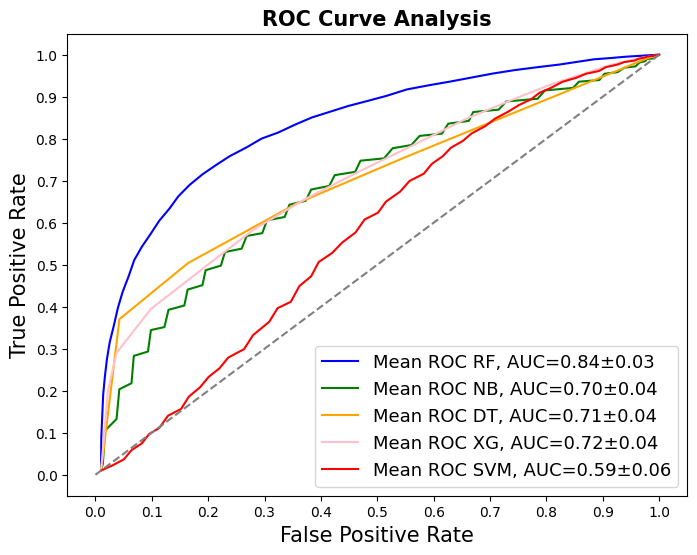

In [30]:
#TABLA RESULTADOS SOBRE MATRIZ DE CONFUSION Y CURVA ROC
result_table = pd.DataFrame(columns=['classifiers','fpr','tpr','auc'])

graph_acc=[]
Acc = [];Rec = [];Pre = [];acc = [];rec = [];pre = [];acc_std = [];rec_std = [];pre_std = [];F1 = [];Matt = [];f1 = []; matt=[];f1_std = []; matt_std = []
Std = [];Mean = [];Fpr = [];Tpr = [];Auc = [];Auc2 = [];Auc3 = []
mean_tpr=[]; W_range = range(0, 100)


X=df_ref[fc_merge]
Y=df_ref.Class
X_p=preprocessing.normalize(X)
X_prandom=preprocessing.normalize(Xrandom)
count = 0
for cls in classifiers: #BUCLE PARA CADA ALGORITMO CLASIFICADOR, RANDOM FOREST
    count=count+1
    if count == 1:
        name = "RF"
    if count == 2:
        name = "NB"
    if count == 3:
        name = "DT"
    if count == 4:
        name = "SVM"
    if count ==5:
        name = "XG"
    for i in W_range:   #BUCLE DE 100 REPETICIONES
        fpr_all=[]      #SETEAR VARIABLES, LISTAS VACÍAS PARA MATRIZ DE COSTO
        tpr_all=[]
        df2=df_ref.iloc[np.random.random_integers(256,4567,257),0:74]  #SELECCION DE EJEMPLOS NEGATIVOS
        df2.to_csv('source_nonEpiAlgorithm_'+str(name)+'_'+str(i)+'_merge.csv', index=True)
        df3=df_ref.iloc[0:257,0:74] #EJEMPLOS POSITIVOS
        frames = [df3, df2]
        df4=pd.concat(frames)
        X_r=df4[fc_merge]    #SELECCION DE LOS DESCRIPTORES ELEGIDOS
        Y_r=df4.Class
        Y_r.value_counts()
        X_rn=preprocessing.normalize(X_r)          #ESCALAR VALORES DE DESCRIPTORS
        X_train, X_test, y_train, y_test = train_test_split(X_rn,Y_r, test_size=0.20,random_state=123) #DIVIDIR SET DE DATOS EN ENTRENAMIENTO Y PRUEBA
        model = cls.fit(X_train, y_train)          #CONSTRUIR MODELO
        y_pred = model.predict_proba(X_test)[::,1] #PREDECIR VALORES PARA EL TEST
        fpr, tpr, _ = roc_curve(y_test,y_pred)     #IDENTIFICAR FALSOS Y VERDADEROS POSITIVOS PARA CONTRUIR CURVA ROC
        fpr_all.append(fpr)
        tpr_all.append(tpr)
        auc = roc_auc_score(y_test, y_pred)        #CALCULAR VALORES PARA CURVA ROC
        Auc.append(auc)
        Acc.append(metrics.accuracy_score(y_test, y_pred.round())) #CALCULAR ESTADICTICAS ACCURACY, RECALL Y PRECISION
        Rec.append(metrics.recall_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        F1.append(metrics.f1_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Matt.append(metrics.matthews_corrcoef(y_test,y_pred.round()))
        result_table = result_table._append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

    Auc2.append(np.mean(Auc))
    Auc3.append(np.std(Auc))
    acc.append(np.mean(Acc)) #RESCATAR VALORES PARA CADA CLASIFICADOR
    rec.append(np.mean(Rec))
    pre.append(np.mean(Pre))
    f1.append(np.mean(F1))
    matt.append(np.mean(Matt))
    acc_std.append(np.std(Acc))
    rec_std.append(np.std(Rec))
    pre_std.append(np.std(Pre))
    f1_std.append(np.std(F1))
    matt_std.append(np.std(Matt))
    Auc=[] #VACIAR LISTAS
    Acc=[]
    Rec=[]
    Pre=[]
    F1=[]
    Matt=[]

##IMPRESION DE ESTADISTICAS ACCURACY, RECALL Y PRECISION JUNTO A SUS DESVIACIONES
print("RF,GaussianNB,DT,XGB,SVC")
#RF,GaussianNB,DT,XGB,SVC 
print("acc")
print(acc,acc_std)
print("rec")
print(rec,rec_std)
print("pre")
print(pre,pre_std)
print("f1")
print(f1,f1_std)
print("matt")
print(matt,matt_std)

fpr_rf=result_table['fpr'][0:99]
fpr_nb=result_table['fpr'][100:199]
fpr_dt=result_table['fpr'][200:299]
fpr_xg=result_table['fpr'][300:399]
fpr_svm=result_table['fpr'][400:499]

tpr_rf=result_table['tpr'][0:99]
tpr_nb=result_table['tpr'][100:199]
tpr_dt=result_table['tpr'][200:299]
tpr_xg=result_table['tpr'][300:399]
tpr_svm=result_table['tpr'][400:499]

fpr_rf =fpr_rf.to_list()
fpr_nb =fpr_nb.to_list()
fpr_dt =fpr_dt.to_list()
fpr_xg =fpr_xg.to_list()
fpr_svm =fpr_svm.to_list()

tpr_rf =tpr_rf.to_list()
tpr_nb =tpr_nb.to_list()
tpr_dt =tpr_dt.to_list()
tpr_xg =tpr_xg.to_list()
tpr_svm=tpr_svm.to_list()

matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_rf = np.mean(matrix,axis=1)
std_fpr_rf = np.std(matrix,axis=1)
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_rf = np.mean(matrix,axis=1)
std_tpr_rf = np.std(matrix,axis=1)


for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_dt = np.mean(matrix,axis=1)
std_fpr_dt = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_dt = np.mean(matrix,axis=1)
std_tpr_dt = np.std(matrix,axis=1)

matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_svm = np.mean(matrix,axis=1)
std_fpr_svm = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_svm = np.mean(matrix,axis=1)
std_tpr_svm = np.std(matrix,axis=1)


for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_nb:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_nb = np.mean(matrix,axis=1)
std_fpr_nb = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_nb:            
    col=0
    for elemento2 in elemento:    
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1    
    fila=fila+1 
mean_tpr_nb = np.mean(matrix,axis=1)
std_tpr_nb = np.std(matrix,axis=1)
##xg
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_xg:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_xg = np.mean(matrix,axis=1)
std_fpr_xg = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_xg:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1
mean_tpr_xg = np.mean(matrix,axis=1)
std_tpr_xg = np.std(matrix,axis=1)


plt.figure(figsize=(8,6))
clasif = ["RF","NB","DT","XG","SVM"]
#RF,GaussianNB,DT,XGB,SVC 
plt.plot(mean_fpr_rf, mean_tpr_rf, color='blue', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[0], Auc2[0],Auc3[0]))
plt.plot(mean_fpr_nb, mean_tpr_nb, color='green', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[1], Auc2[1],Auc3[1]))
plt.plot(mean_fpr_dt, mean_tpr_dt, color='orange', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[2], Auc2[2],Auc3[2]))
plt.plot(mean_fpr_xg, mean_tpr_xg, color='pink', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[3], Auc2[3],Auc3[3]))
plt.plot(mean_fpr_svm, mean_tpr_svm, color='red', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[4], Auc2[4],Auc3[4]))
plt.plot([0,1], [0,1], color='grey', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
result_table.set_index('classifiers', inplace=True)
plt.savefig('ROCcurve_3_mix_Algorithm.png')
plt.show()


## Test the model with all the epitopes

In [31]:
fc_merge=[
    'PartialSpecificVolume', 'st7', 'at_hmoment_sheet', 'PorcAromatic', 'Blosum4', 'MsWhim1', 't3', 
    'at_hmoment_alpha', 'DoubleBendPreference', 'Blosum8', 't2', 'Blosum2', 't4', 'st5', 'at_boman',
    'pKC', 'MsWhim3', 'OccurrenceInAlphaRegion', 'ElectronicProperties', 'st8', 
    'PorcBasic', 'PorcAcidic', 
    'ExtendedStructurePreference', 'Blosum9', 'st4', 'z2', 'PorcPolar', 'PorcAliphatic', 
    'PorcNonPolar', 'Blosum6', 'Blosum3', 'FlatExtendedPreference', 'Blosum10', 'st3']

acc
[0.7644660194174755] [0.037315417467968195]
rec
[0.755576923076923] [0.043961975904681386]
pre
[0.7749855124921484] [0.04754113672374973]
f1
[0.7641489339198582] [0.036272593086296295]
matt
[0.5305078381227022] [0.07508625675931695]


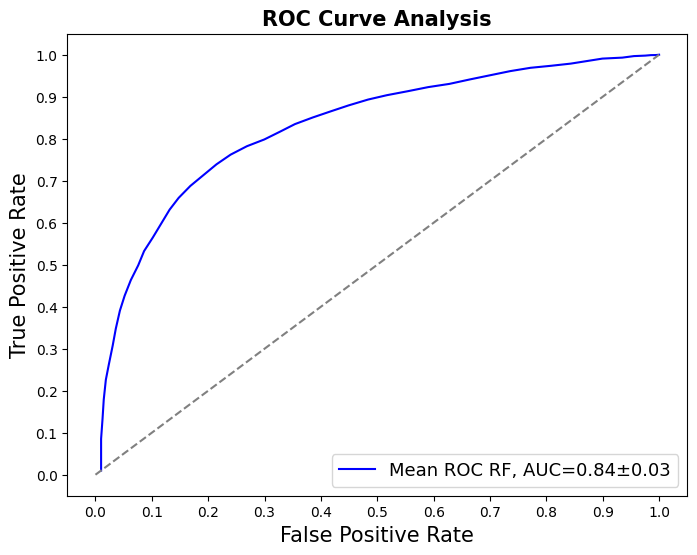

['modelScript.joblib']

In [36]:
#save model
from sklearn.ensemble import RandomForestClassifier
from joblib import dump, load
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#input
cols=[*range(1, 75, 1)]
df_ref = pd.read_csv('descriptors_class_influenza_nonEpiAlgorithm.csv', sep=',',usecols=cols)
feature_cols =['PorcTiny','PorcSmall','PorcAliphatic','PorcAromatic','PorcNonPolar','PorcPolar','PorcCharged','PorcBasic','PorcAcidic','at_index','at_boman','at_charge','at_pi','at_hmoment_alpha','at_hmoment_sheet','HelixBendPreference','SideChainSize','ExtendedStructurePreference','Hidrophobicity','DoubleBendPreference','PartialSpecificVolume','FlatExtendedPreference','OccurrenceInAlphaRegion','pKC','SurroundingHidrophobicity','Blosum1','Blosum2','Blosum3','Blosum4','Blosum5','Blosum6','Blosum7','Blosum8','Blosum9','Blosum10','MsWhim1','MsWhim2','MsWhim3','st1','st2','st3','st4','st5','st6','st7','st8','t1','t2','t3','t4','t5','z1','z2','z3','z4','z5','HydrophobicityIndex','AlphaAndTurnPropensities','BulkyProperties','CompositionalCharacteristicIndex','LocalFlexibility','ElectronicProperties']


#TABLA RESULTADOS SOBRE MATRIZ DE CONFUSION Y CURVA ROC
classifiers = [RandomForestClassifier(random_state=123)]
result_table = pd.DataFrame(columns=['classifiers','fpr','tpr','auc'])

graph_acc=[]
Acc = [];Rec = [];Pre = [];acc = [];rec = [];pre = [];acc_std = [];rec_std = [];pre_std = [];F1 = [];Matt = [];f1 = []; matt=[];f1_std = []; matt_std = []
Std = [];Mean = [];Fpr = [];Tpr = [];Auc = [];Auc2 = [];Auc3 = []
mean_tpr=[]; W_range = range(0, 100)


for cls in classifiers: #BUCLE PARA CADA ALGORITMO CLASIFICADOR, RANDOM FOREST
    #print(cls)
    for i in W_range:   #BUCLE DE 100 REPETICIONES
        fpr_all=[]      #SETEAR VARIABLES, LISTAS VACÍAS PARA MATRIZ DE COSTO
        tpr_all=[]
        df2=df_ref.iloc[np.random.random_integers(256,4567,256),0:74]  #SELECCION DE EJEMPLOS NEGATIVOS
        df2.to_csv('source_nonEpiRef_RF_'+str(i)+'.csv', index=True)
        df3=df_ref.iloc[0:257,0:74] #EJEMPLOS POSITIVOS
        frames = [df3, df2]
        df4=pd.concat(frames)
        X_r=df4[fc_merge]    #SELECCION DE LOS DESCRIPTORES ELEGIDOS
        Y_r=df4.Class
        Y_r.value_counts()
        X_rn=preprocessing.normalize(X_r)          #ESCALAR VALORES DE DESCRIPTORS
        X_train, X_test, y_train, y_test = train_test_split(X_rn,Y_r, test_size=0.20, random_state=123) #DIVIDIR SET DE DATOS EN ENTRENAMIENTO Y PRUEBA
        model = cls.fit(X_train, y_train)          #CONSTRUIR MODELO
        y_pred = model.predict_proba(X_test)[::,1] #PREDECIR VALORES PARA EL TEST
        fpr, tpr, _ = roc_curve(y_test,y_pred)     #IDENTIFICAR FALSOS Y VERDADEROS POSITIVOS PARA CONTRUIR CURVA ROC
        fpr_all.append(fpr)
        tpr_all.append(tpr)
        auc = roc_auc_score(y_test, y_pred)        #CALCULAR VALORES PARA CURVA ROC
        Auc.append(auc)
        Acc.append(metrics.accuracy_score(y_test, y_pred.round())) #CALCULAR ESTADICTICAS ACCURACY, RECALL Y PRECISION
        Rec.append(metrics.recall_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Pre.append(metrics.precision_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        F1.append(metrics.f1_score(y_test,y_pred.round(),average='binary',pos_label = 1))
        Matt.append(metrics.matthews_corrcoef(y_test,y_pred.round()))
        result_table = result_table._append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

    Auc2.append(np.mean(Auc))
    Auc3.append(np.std(Auc))
    acc.append(np.mean(Acc)) #RESCATAR VALORES PARA CADA CLASIFICADOR
    rec.append(np.mean(Rec))
    pre.append(np.mean(Pre))
    f1.append(np.mean(F1))
    matt.append(np.mean(Matt))
    acc_std.append(np.std(Acc))
    rec_std.append(np.std(Rec))
    pre_std.append(np.std(Pre))
    f1_std.append(np.std(F1))
    matt_std.append(np.std(Matt))
    Auc=[] #VACIAR LISTAS
    Acc=[]
    Rec=[]
    Pre=[]
    F1=[]
    Matt=[]

##IMPRESION DE ESTADISTICAS ACCURACY, RECALL Y PRECISION JUNTO A SUS DESVIACIONES

print("acc")
print(acc,acc_std)
print("rec")
print(rec,rec_std)
print("pre")
print(pre,pre_std)
print("f1")
print(f1,f1_std)
print("matt")
print(matt,matt_std)

fpr_rf=result_table['fpr'][0:99]
fpr_nb=result_table['fpr'][100:199]
fpr_dt=result_table['fpr'][200:299]
fpr_xg=result_table['fpr'][300:399]
fpr_svm=result_table['fpr'][400:499]

tpr_rf=result_table['tpr'][0:99]
tpr_nb=result_table['tpr'][100:199]
tpr_dt=result_table['tpr'][200:299]
tpr_xg=result_table['tpr'][300:399]
tpr_svm=result_table['tpr'][400:499]

fpr_rf =fpr_rf.to_list()
fpr_nb =fpr_nb.to_list()
fpr_dt =fpr_dt.to_list()
fpr_xg =fpr_xg.to_list()
fpr_svm =fpr_svm.to_list()

tpr_rf =tpr_rf.to_list()
tpr_nb =tpr_nb.to_list()
tpr_dt =tpr_dt.to_list()
tpr_xg =tpr_xg.to_list()
tpr_svm=tpr_svm.to_list()

matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_rf = np.mean(matrix,axis=1)
std_fpr_rf = np.std(matrix,axis=1)
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_rf:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_rf = np.mean(matrix,axis=1)
std_tpr_rf = np.std(matrix,axis=1)


for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_dt = np.mean(matrix,axis=1)
std_fpr_dt = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_dt:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_dt = np.mean(matrix,axis=1)
std_tpr_dt = np.std(matrix,axis=1)

matrix=np.zeros((2000,100))
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_svm = np.mean(matrix,axis=1)
std_fpr_svm = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_svm:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_tpr_svm = np.mean(matrix,axis=1)
std_tpr_svm = np.std(matrix,axis=1)


for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_nb:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_nb = np.mean(matrix,axis=1)
std_fpr_nb = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_nb:            
    col=0
    for elemento2 in elemento:    
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1    
    fila=fila+1 
mean_tpr_nb = np.mean(matrix,axis=1)
std_tpr_nb = np.std(matrix,axis=1)
##xg
for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in fpr_xg:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1 
mean_fpr_xg = np.mean(matrix,axis=1)
std_fpr_xg = np.std(matrix,axis=1)

for i in np.arange(0,2000,1):
    for j in np.arange(0,100,1):
        matrix[i][j]=1
        j=j+1
    i=i+1    
fila=0
for elemento in tpr_xg:            # lista de largo 100 y de 83 valores c/u, hay que sumar las 100 filas de 83 cols 
    col=0
    for elemento2 in elemento:    # 84
        if col < 2000: #columnas
            matrix[col][fila]=elemento2
        col=col+1     # hasta el 83 #   nuevalista.append(elemento2) #  print(nuevalista)
    fila=fila+1
mean_tpr_xg = np.mean(matrix,axis=1)
std_tpr_xg = np.std(matrix,axis=1)


plt.figure(figsize=(8,6))
clasif = ["RF"]
plt.plot(mean_fpr_rf, mean_tpr_rf, color='blue', label="Mean ROC {}, AUC={:.2f}±{:.2f}".format(clasif[0], Auc2[0],Auc3[0]))
plt.plot([0,1], [0,1], color='grey', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
result_table.set_index('classifiers', inplace=True)
plt.savefig('save_Script.png')
plt.show()
cls_script=cls
dump(cls_script, 'modelScript.joblib')

In [38]:
from sklearn.ensemble import RandomForestClassifier

fc3=['PartialSpecificVolume', 'st7', 'at_hmoment_sheet', 'PorcAromatic', 'Blosum4', 'MsWhim1', 't3', 
    'at_hmoment_alpha', 'DoubleBendPreference', 'Blosum8', 't2', 'Blosum2', 't4', 'st5', 'at_boman',
    'pKC', 'MsWhim3', 'OccurrenceInAlphaRegion', 'ElectronicProperties', 'st8', 
    'PorcBasic', 'PorcAcidic', 
    'ExtendedStructurePreference', 'Blosum9', 'st4', 'z2', 'PorcPolar', 'PorcAliphatic', 
    'PorcNonPolar', 'Blosum6', 'Blosum3', 'FlatExtendedPreference', 'Blosum10', 'st3']

X = pd.read_csv('descriptors_class_influenza_nonEpiAlgorithm.csv', sep=',',usecols=cols)
#print(X[fc3])
predicciones = cls_script.predict(X[fc3])

y_prueba_real = X.Class

exactitud = metrics.accuracy_score(y_prueba_real, predicciones)
#print("real")
#print(list(y_prueba_real))
#print("pred")
#print(list(predicciones))
print(f'Accurracy for influenza virus epitopes 80/20: {exactitud}')

Accurracy for influenza virus epitopes 80/20: 0.8647110332749562


In [40]:
from sklearn.ensemble import RandomForestClassifier

fc3=['PartialSpecificVolume', 'st7', 'at_hmoment_sheet', 'PorcAromatic', 'Blosum4', 'MsWhim1', 't3', 
    'at_hmoment_alpha', 'DoubleBendPreference', 'Blosum8', 't2', 'Blosum2', 't4', 'st5', 'at_boman',
    'pKC', 'MsWhim3', 'OccurrenceInAlphaRegion', 'ElectronicProperties', 'st8', 
    'PorcBasic', 'PorcAcidic', 
    'ExtendedStructurePreference', 'Blosum9', 'st4', 'z2', 'PorcPolar', 'PorcAliphatic', 
    'PorcNonPolar', 'Blosum6', 'Blosum3', 'FlatExtendedPreference', 'Blosum10', 'st3']

X = pd.read_csv('descriptors_class_vaccines_hv1.csv', sep=',',usecols=cols)
#pd.read_csv('descriptors_class_influenza_nonEpiRef.csv', sep=',',usecols=cols)
#print(X[fc3])
predicciones = cls_script.predict(X[fc3])

y_prueba_real = X.Class

exactitud = metrics.accuracy_score(y_prueba_real, predicciones)
#print("real")
#print(list(y_prueba_real))
#print("pred")
#print(list(predicciones))
print(f'Accurracy for herpes virus epitopes 80/20: {exactitud}')

Accurracy for herpes virus epitopes 80/20: 0.4973221117061974


In [41]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score 
##merge
fc_merge=['PartialSpecificVolume', 'st7', 'at_hmoment_sheet', 'PorcAromatic', 'Blosum4', 'MsWhim1', 't3', 
    'at_hmoment_alpha', 'DoubleBendPreference', 'Blosum8', 't2', 'Blosum2', 't4', 'st5', 'at_boman',
    'pKC', 'MsWhim3', 'OccurrenceInAlphaRegion', 'ElectronicProperties', 'st8', 
    'PorcBasic', 'PorcAcidic', 
    'ExtendedStructurePreference', 'Blosum9', 'st4', 'z2', 'PorcPolar', 'PorcAliphatic', 
    'PorcNonPolar', 'Blosum6', 'Blosum3', 'FlatExtendedPreference', 'Blosum10', 'st3']
#print(fc_merge)
#input
cols=[*range(1, 75, 1)]
df_ref = pd.read_csv('descriptors_class_influenza_nonEpiAlgorithm.csv', sep=',',usecols=cols)
feature_cols =['PorcTiny','PorcSmall','PorcAliphatic','PorcAromatic','PorcNonPolar','PorcPolar','PorcCharged','PorcBasic','PorcAcidic','at_index','at_boman','at_charge','at_pi','at_hmoment_alpha','at_hmoment_sheet','HelixBendPreference','SideChainSize','ExtendedStructurePreference','Hidrophobicity','DoubleBendPreference','PartialSpecificVolume','FlatExtendedPreference','OccurrenceInAlphaRegion','pKC','SurroundingHidrophobicity','Blosum1','Blosum2','Blosum3','Blosum4','Blosum5','Blosum6','Blosum7','Blosum8','Blosum9','Blosum10','MsWhim1','MsWhim2','MsWhim3','st1','st2','st3','st4','st5','st6','st7','st8','t1','t2','t3','t4','t5','z1','z2','z3','z4','z5','HydrophobicityIndex','AlphaAndTurnPropensities','BulkyProperties','CompositionalCharacteristicIndex','LocalFlexibility','ElectronicProperties']
df_ref.to_csv('source_AllDataScript.csv', index=True)
X_final=df_ref[fc_merge]    #SELECCION DE LOS DESCRIPTORES ELEGIDOS
y_final=df_ref.Class

final_model = RandomForestClassifier(random_state=123)
final_model.fit(X_final, y_final)
dump(final_model, 'modelScript.joblib') 
#y_preds = final_model.predict(X_final)
#print(list(y_preds))
#print(list(y_final))
#accuracy = accuracy_score(y_final, y_preds)
#print(f"Test Accuracy: {test_acc:.2f}")

['modelScript.joblib']

In [42]:
from sklearn.ensemble import RandomForestClassifier

fc3=['PartialSpecificVolume', 'st7', 'at_hmoment_sheet', 'PorcAromatic', 'Blosum4', 'MsWhim1', 't3', 
    'at_hmoment_alpha', 'DoubleBendPreference', 'Blosum8', 't2', 'Blosum2', 't4', 'st5', 'at_boman',
    'pKC', 'MsWhim3', 'OccurrenceInAlphaRegion', 'ElectronicProperties', 'st8', 
    'PorcBasic', 'PorcAcidic', 
    'ExtendedStructurePreference', 'Blosum9', 'st4', 'z2', 'PorcPolar', 'PorcAliphatic', 
    'PorcNonPolar', 'Blosum6', 'Blosum3', 'FlatExtendedPreference', 'Blosum10', 'st3']

X = pd.read_csv('descriptors_class_influenza_nonEpiAlgorithm.csv', sep=',',usecols=cols)
#print(X[fc3])
predicciones = final_model.predict(X[fc3])

y_prueba_real = X.Class

exactitud = metrics.accuracy_score(y_prueba_real, predicciones)
#print("real")
#print(list(y_prueba_real))
#print("pred")
#print(list(predicciones))
print(f'Accurracy for influenza epitopes 100/100: {exactitud}')

Accurracy for influenza epitopes 100/100: 1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

fc3=['PartialSpecificVolume', 'st7', 'at_hmoment_sheet', 'PorcAromatic', 'Blosum4', 'MsWhim1', 't3', 
    'at_hmoment_alpha', 'DoubleBendPreference', 'Blosum8', 't2', 'Blosum2', 't4', 'st5', 'at_boman',
    'pKC', 'MsWhim3', 'OccurrenceInAlphaRegion', 'ElectronicProperties', 'st8', 
    'PorcBasic', 'PorcAcidic', 
    'ExtendedStructurePreference', 'Blosum9', 'st4', 'z2', 'PorcPolar', 'PorcAliphatic', 
    'PorcNonPolar', 'Blosum6', 'Blosum3', 'FlatExtendedPreference', 'Blosum10', 'st3']

X = pd.read_csv('descriptors_class_vaccines_hv1.csv', sep=',',usecols=cols)
#print(X[fc3])
predicciones = final_model.predict(X[fc3])

y_prueba_real = X.Class

exactitud = metrics.accuracy_score(y_prueba_real, predicciones)
#print("real")
#print(list(y_prueba_real))
#print("pred")
#print(list(predicciones))
print(f'Accurracy for herpes virus epitopes 100/100: {exactitud}')